In [38]:
"""
Implementation of MLP algorithm using CICDos2019 data set
Created on October 29 2020
By Maritza Rosales H.
All rights reserved
"""

from numpy import array, save, asarray
from keras.models import Sequential, save_model, load_model
from keras.layers import LSTM, Dense, Dropout, GRU
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPooling1D
import pickle
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import scikitplot as skplt
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from numpy.random import seed
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score,roc_auc_score
seed(7)

In [37]:
pip install scikit-plot

In [39]:
def split_sequence(sequence, n_steps, classes):
    X, y = [], []
    for i in range(0, len(sequence), n_steps):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x = sequence[i:end_ix]
        seq_y = array(classes[i:end_ix])
        if np.sum(seq_y)==0:
            seq_y = 0; # normal
        else:
            seq_y = seq_y[seq_y>0]                 # ignore normal events 
            seq_y = np.argmax (np.bincount(seq_y)) # select most frequent attack
        X.append(seq_x)
        y.append(seq_y) 
    return array(X), array(y)

In [40]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
F  = pd.read_csv('/content/drive/My Drive/GrupoEstudiantesAgo-Dic2020/IDS/DataSets/CICDoS2017/Pre-processed/dataTrain.csv')
F.columns

xtrainlabel = F.loc[:,['Label']].values

xtrain = F.loc[:, ['Flow.Duration', 'Tot.Fwd.Pkts', 'Tot.Bwd.Pkts', 'TotLen.Fwd.Pkts',
       'TotLen.Bwd.Pkts', 'Fwd.Pkt.Len.Max', 'Fwd.Pkt.Len.Min',
       'Fwd.Pkt.Len.Std', 'Bwd.Pkt.Len.Max', 'Bwd.Pkt.Len.Min',
       'Bwd.Pkt.Len.Std', 'Flow.Byts.s', 'Flow.Pkts.s', 'Flow.IAT.Mean',
       'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Mean',
       'Fwd.IAT.Std', 'Fwd.IAT.Min', 'Bwd.IAT.Tot', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Pkts.s', 'Bwd.Pkts.s', 'Pkt.Len.Min', 'Pkt.Len.Max',
       'Pkt.Len.Mean', 'Pkt.Len.Std', 'Pkt.Len.Var', 'FIN.Flag.Cnt',
       'SYN.Flag.Cnt', 'RST.Flag.Cnt', 'PSH.Flag.Cnt', 'Down.Up.Ratio',
       'Bwd.Pkts.b.Avg', 'Bwd.Blk.Rate.Avg', 'Subflow.Fwd.Pkts',
       'Subflow.Fwd.Byts', 'Subflow.Bwd.Byts', 'Init.Fwd.Win.Byts',
       'Init.Bwd.Win.Byts', 'Fwd.Seg.Size.Min', 'Idle.Mean', 'Idle.Std',
       'Idle.Min']].values


In [42]:
print(xtrain.shape)

(102692, 49)


In [43]:
# Feature scaling> standarize data
fit = StandardScaler().fit(xtrain)
xtrain = fit.transform(xtrain)
#joblib.dump(fit, "gdrive/My Drive/Datasets/scaler_cic2017.joblib")

In [44]:
#PCA for 85% 
pca = PCA(.85)
pca.fit(xtrain)
pca.n_components_ 
#joblib.dump(pca, "gdrive/My Drive/Datasets/pca.joblib") 
print(pca.n_components_)


16


In [45]:
# set number of features
n_features = xtrain.shape[1]
# set number of time steps
n_steps = 1
# split into [samples, timesteps, features]
x_train, y_train = split_sequence(xtrain, n_steps, xtrainlabel)
print(n_features)

49


In [46]:
print(x_train.shape)
print(y_train.shape)

(102691, 1, 49)
(102691,)


In [ ]:
# define parameters
batch_size = 300 # samples per stack
epochs = 80
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

model = Sequential()
model.add(Dense(15, input_shape=(n_steps, n_features), activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(9,activation='softmax'))

#optimizer
adam = Adam(lr=1, beta_1=0.9,beta_2=0.999, epsilon=1e-08)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
model.fit(x_train, y_train, batch_size, epochs=epochs)

Clases  49
(102692, 49)
(20538, 5, 49)
(20538,)
(55873, 49)
(11174, 5, 49)
(11174,)


LOAD MODEL

In [47]:
model = load_model('/content/drive/MyDrive/GrupoEstudiantesAgo-Dic2020/IDS/Aplicaciones/Modelling/Best Model Objects/CICDoS2017/mlp/MLP2017')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1, 15)             750       
_________________________________________________________________
dense_1 (Dense)              (None, 1, 12)             192       
_________________________________________________________________
dense_2 (Dense)              (None, 1, 10)             130       
_________________________________________________________________
dense_3 (Dense)              (None, 1, 9)              99        
Total params: 1,171
Trainable params: 1,171
Non-trainable params: 0
_________________________________________________________________
None


test on training

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
yhat = model.predict(x_train)
yyhat = []
for k in range (0,len(yhat)):
    yh = np.argmax(yhat[k]) # max probability
    yyhat.append(yh)
accuracy = metrics.accuracy_score(y_train, yyhat)
print(accuracy)
# precision recall and fscore
precision_recall_fscore_support(y_train, yyhat, average='weighted')

0.9902717862324839


(0.9903866639521666, 0.9902717862324839, 0.9903125487670115, None)

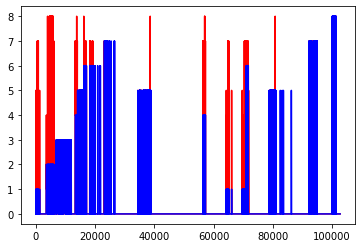

In [ ]:
# demonstrate verify fitting on training
yhat = model.predict(x_train)
yyhat = []
for k in range (0,len(yhat)):
    yh = np.argmax(yhat[k]) # max probability
    yyhat.append(yh)
plt.figure(1)
plt.plot(yyhat,'r', y_train,'b')  


In [48]:
# load testing data
F_test  =  pd.read_csv('/content/drive/My Drive/GrupoEstudiantesAgo-Dic2020/IDS/DataSets/CICDoS2017/Pre-processed/dataTest.csv')

In [49]:
y_test = F_test.loc[:,['Label']].values

x_test = F_test.loc[:, ['Flow.Duration', 'Tot.Fwd.Pkts', 'Tot.Bwd.Pkts', 'TotLen.Fwd.Pkts',
       'TotLen.Bwd.Pkts', 'Fwd.Pkt.Len.Max', 'Fwd.Pkt.Len.Min',
       'Fwd.Pkt.Len.Std', 'Bwd.Pkt.Len.Max', 'Bwd.Pkt.Len.Min',
       'Bwd.Pkt.Len.Std', 'Flow.Byts.s', 'Flow.Pkts.s', 'Flow.IAT.Mean',
       'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Mean',
       'Fwd.IAT.Std', 'Fwd.IAT.Min', 'Bwd.IAT.Tot', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Pkts.s', 'Bwd.Pkts.s', 'Pkt.Len.Min', 'Pkt.Len.Max',
       'Pkt.Len.Mean', 'Pkt.Len.Std', 'Pkt.Len.Var', 'FIN.Flag.Cnt',
       'SYN.Flag.Cnt', 'RST.Flag.Cnt', 'PSH.Flag.Cnt', 'Down.Up.Ratio',
       'Bwd.Pkts.b.Avg', 'Bwd.Blk.Rate.Avg', 'Subflow.Fwd.Pkts',
       'Subflow.Fwd.Byts', 'Subflow.Bwd.Byts', 'Init.Fwd.Win.Byts',
       'Init.Bwd.Win.Byts', 'Fwd.Seg.Size.Min', 'Idle.Mean', 'Idle.Std',
       'Idle.Min']].values


x_test = fit.transform(x_test)

# split into [samples, timesteps, features]
x_test, y_test = split_sequence(x_test, n_steps, y_test)

print(x_test.shape)
print(y_test.shape)

(55872, 1, 49)
(55872,)


0.9740468945766959


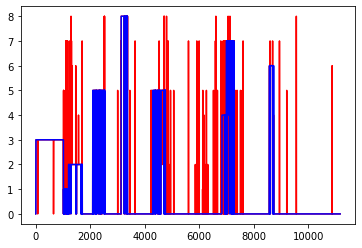

In [ ]:
# TESTING MODEL WITH NEW DATA
yhat = model.predict(x_t)

y_pred = []
for k in range (0,len(yhat)):
    yh = np.argmax(yhat[k])
    y_pred.append(yh)
plt.figure(0)
plt.plot(y_pred,'r', y_t,'b')  

accuracy_tb = metrics.accuracy_score(y_t, y_pred)
print(accuracy_tb)

***************************************************************
EVALUATE MODEL ON TESTING DATA
1746/1746 [==============================] - 1s 855us/step - loss: 0.1279 - sparse_categorical_accuracy: 0.9733
***************************************************************
Assessment: 2 classes
Accuracy 0.9813323310423826
Precision 0.9812732964113233
F1-SCORE 0.9812379044125495
RECALL (TPR) 0.9813323310423826
FALSE POS. RATE (FPR) 0.00772273497833867
***************************************************************
Assessment: n classes
Accuracy 0.9732782073310424
Precision 0.9737664743648055
F1-SCORE 0.972974900043351
RECALL (TPR) 0.9732782073310424


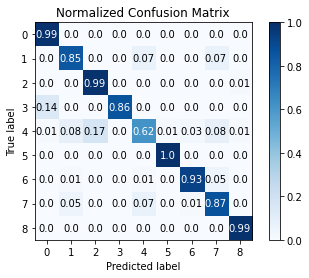

In [ ]:
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score,roc_auc_score
print("***************************************************************")
print("EVALUATE MODEL ON TESTING DATA")
results = model.evaluate(x_test, y_test)
yhat = model.predict(x_test)
yyhat = []
for k in range (0,len(yhat)):
    yh = np.argmax(yhat[k])
    yyhat.append(yh)
print("***************************************************************")    
print("Assessment: 2 classes") 
TP=TN=FP=FN=0
y_test2c = np.array(y_test)
y_test2c [y_test2c>=1] = 1;
y_hat2c = np.array(yyhat)
y_hat2c [y_hat2c>=1] = 1;
print("Accuracy", accuracy_score(y_test2c, y_hat2c))
print("Precision", precision_score(y_test2c, y_hat2c, average='weighted'))
print("F1-SCORE", f1_score(y_test2c, y_hat2c, average='weighted'))
print("RECALL (TPR)", recall_score(y_test2c, y_hat2c, average='weighted'))
 
for k in range (0,len(yhat)):
    ylabel     = y_test[k];
    ypredicted = yyhat[k];
    if ypredicted == 0 and ylabel == 0:
        TN = TN + 1
    elif ypredicted > 0 and ylabel > 0:
        TP = TP + 1
    elif ypredicted > 0 and ylabel == 0:
        FP = FP + 1
    elif ypredicted == 0 and ylabel > 0:
        FN = FN + 1
    else:
        print('any')
# print("ACCURACY", (TP+TN)/(TP+TN+FP+FN))
# print("Precision ", (TP)/(TP+FP))
# print("F1-SCORE", (2*TP)/(2*TP+FP+FN))
# print("RECALL (TPR)", (TP)/(TP+FN))
print("FALSE POS. RATE (FPR)", (FP)/(FP+TN))


print("***************************************************************") 
print("Assessment: n classes") 
print("Accuracy", accuracy_score(y_test, yyhat))
print("Precision", precision_score(y_test, yyhat, average='weighted'))
print("F1-SCORE", f1_score(y_test, yyhat, average='weighted'))
print("RECALL (TPR)", recall_score(y_test, yyhat, average='weighted'))

skplt.metrics.plot_confusion_matrix(y_test,yyhat,normalize="True")


# Time complexity Analysis



In [136]:
import timeit

def prediction():
  yhat = model.predict(x_test[0:10000]);

# load model and testing data

execution_time = timeit.repeat(prediction, number=1, repeat=20)
print('Average Flow/s: ', 1/((min(execution_time))/10000))



Average Flow/s:  28538.070990906104
